<a href="https://colab.research.google.com/github/Prasadk1234/Data-analysis-/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
matches = pd.read_csv('sample_data/matches.csv')
deliveries = pd.read_csv('sample_data/deliveries.csv')

**Deliveries**

In [ ]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


**Matches**

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [ ]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [ ]:

matches.replace(['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiant','Royal Challengers Bangalore',
                'Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers',
                'Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR',
                                                                                   'DC','KTK','PW','RPS'], inplace=True)

deliveries.replace(['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiant','Royal Challengers Bangalore',
                'Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers',
                'Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR',
                                                                                   'DC','KTK','PW','RPS'], inplace=True)

In [ ]:
print("Total matches played:",matches.shape[0])

print("\n Venue Played at:",matches['venue'].unique())
print("\n Teams:",matches['team1'].unique())

Total matches played: 636

 Venue Played at: ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed St

In [ ]:
matches.drop(['umpire3'],axis=1,inplace=True)
deliveries.fillna(0,inplace=True)

In [ ]:
print("Number of Matches at Venues:",matches['venue'].nunique())
print("Total Umpires:",matches['umpire1'].nunique())

Number of Matches at Venues: 35
Total Umpires: 44


In [ ]:
print(matches['player_of_match'].value_counts().idxmax(),"has most of match of the match award")
print(matches['winner'].value_counts().idxmax(),"most winning team")

CH Gayle has most of match of the match award
MI most winning team


In [ ]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]
# MI defeated DD with the runs 146 highest win by runs

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [ ]:
matches.shape

(636, 17)

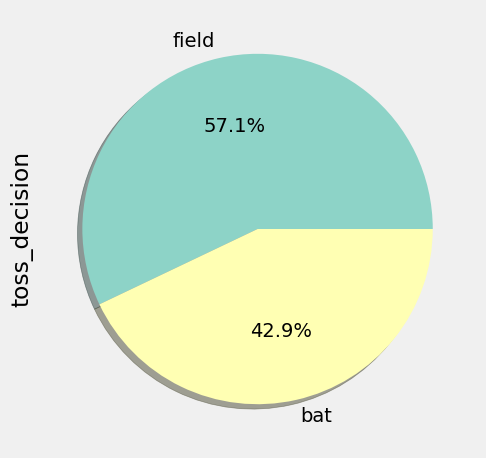

In [ ]:
plt.style.use('fivethirtyeight')
matches['toss_decision'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=plt.cm.Set3.colors,shadow=True)
plt.tight_layout()

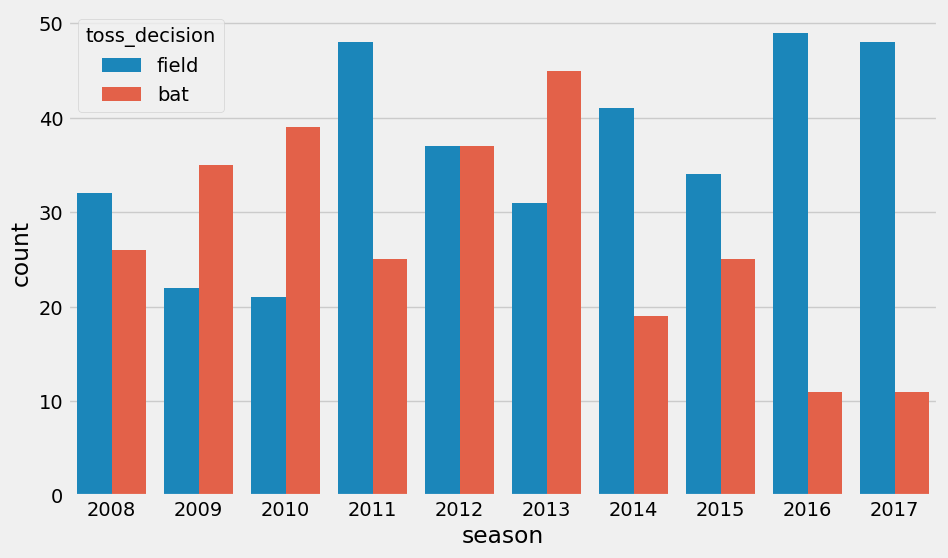

In [ ]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

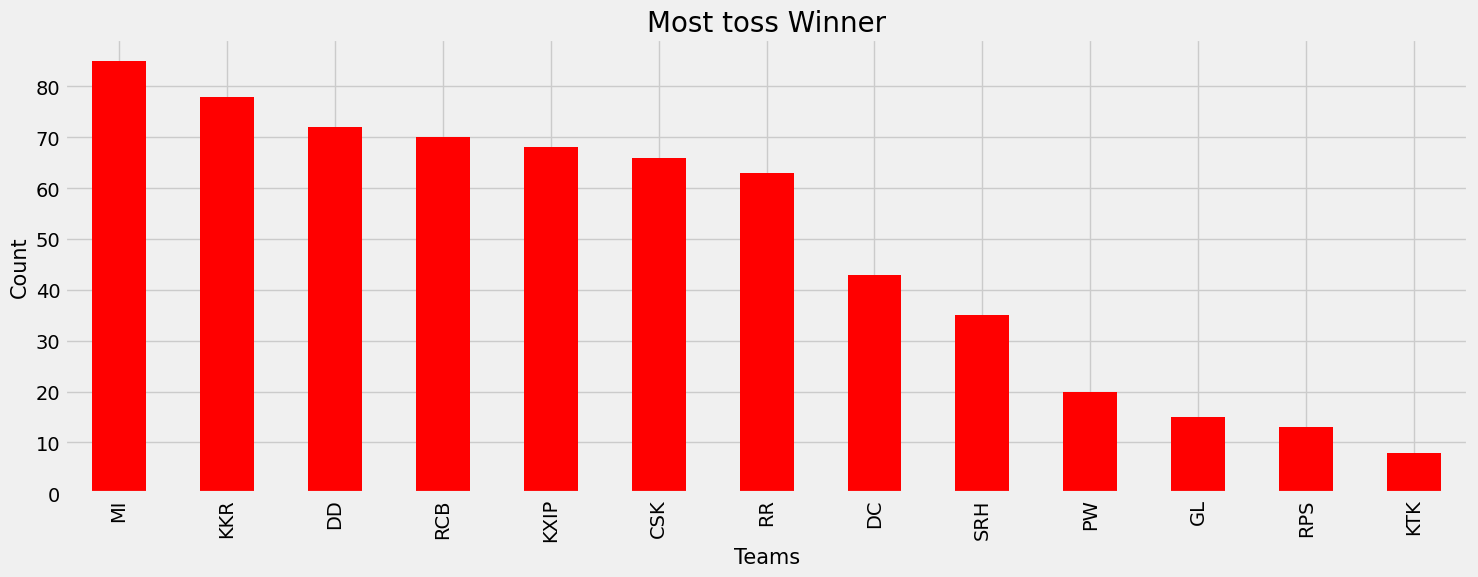

In [ ]:
plt.figure(figsize=(15,6))
matches['toss_winner'].value_counts().plot(kind='bar',color='r')
plt.set_facecolor = '#F0F0F0'
plt.title('Most toss Winner',fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Teams',fontsize=15)
plt.tight_layout()

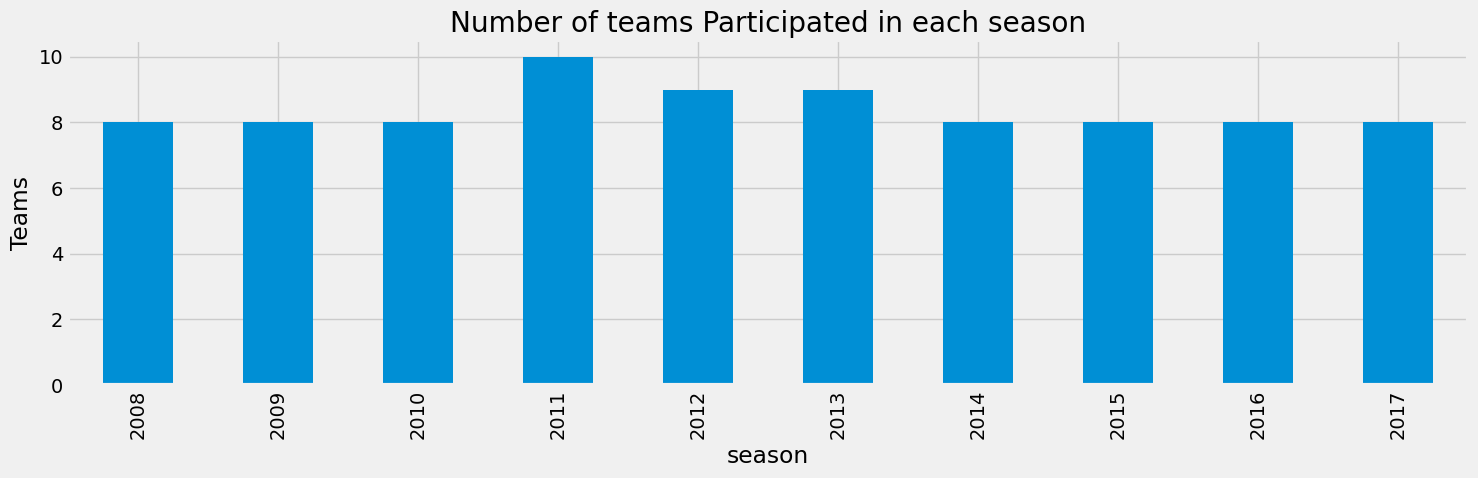

In [ ]:
matches.groupby('season')['team1'].nunique().plot(kind='bar',figsize=(15,5))
plt.title('Number of teams Participated in each season')
plt.ylabel('Teams')
plt.tight_layout()

Text(0, 0.5, 'Matches')

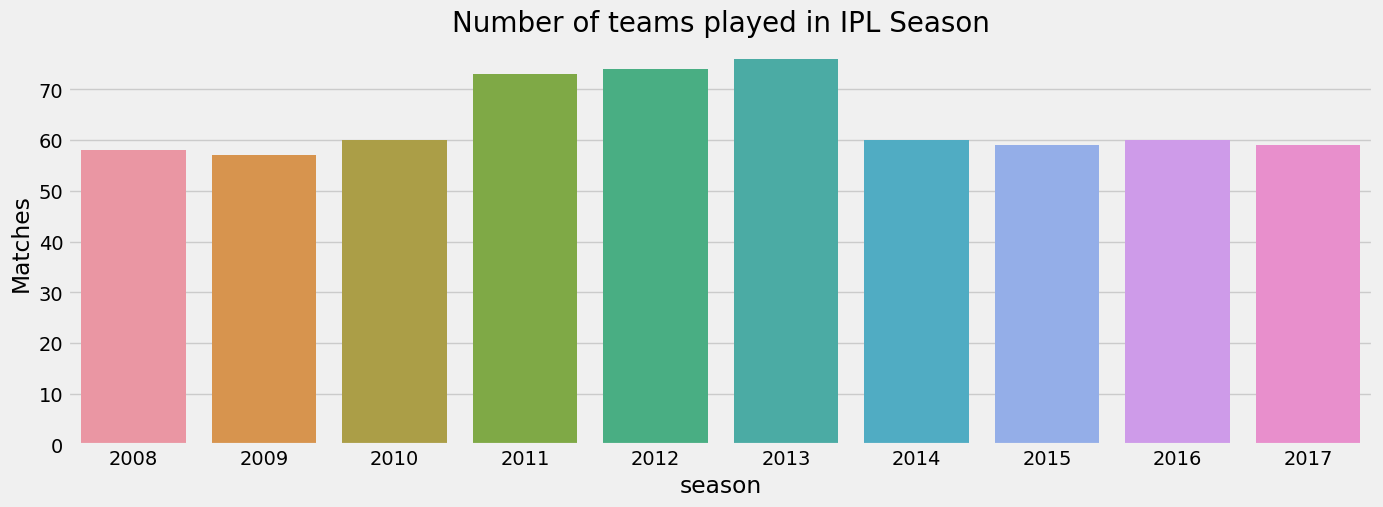

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='season',data=matches)
plt.title("Number of teams played in IPL Season",fontsize=20)
plt.ylabel('Matches')

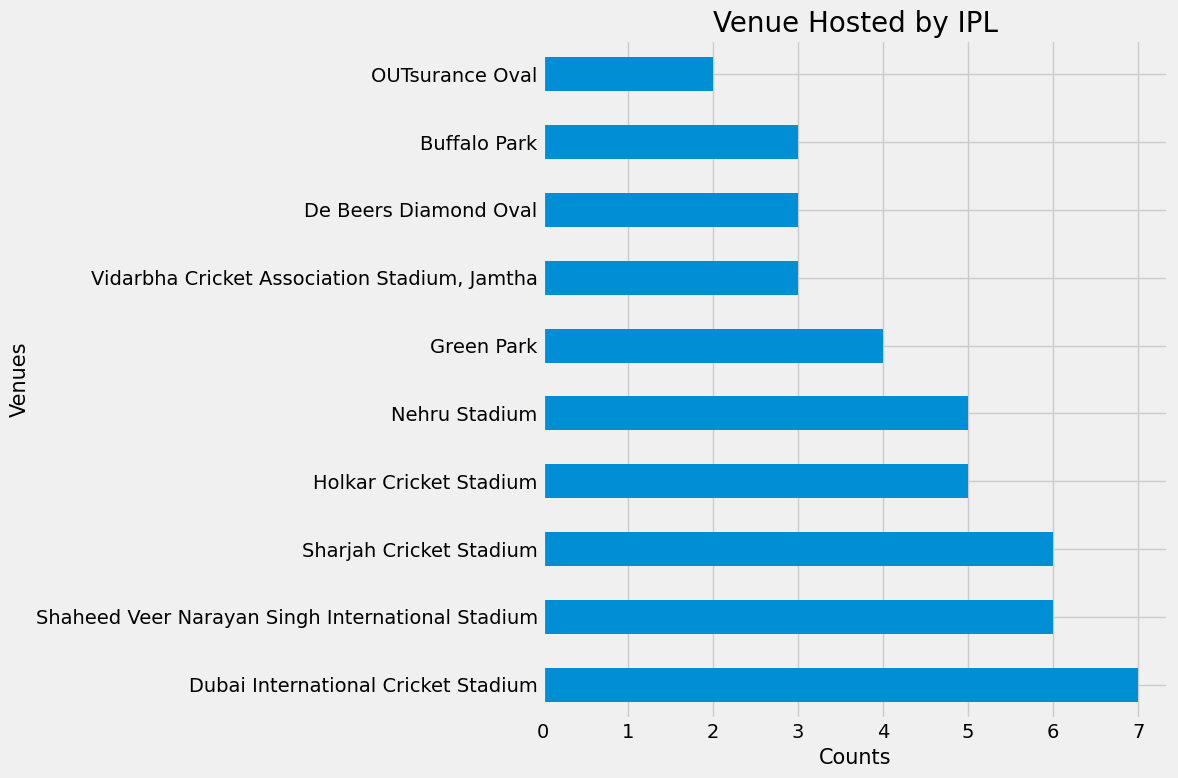

In [ ]:
plt.figure(figsize=(12,8))
matches['venue'].value_counts().tail(10).plot(kind='barh')
plt.title("Venue Hosted by IPL",fontsize=20)
plt.xlabel('Counts',fontsize=15)
plt.ylabel('Venues',fontsize=15)
plt.tight_layout()

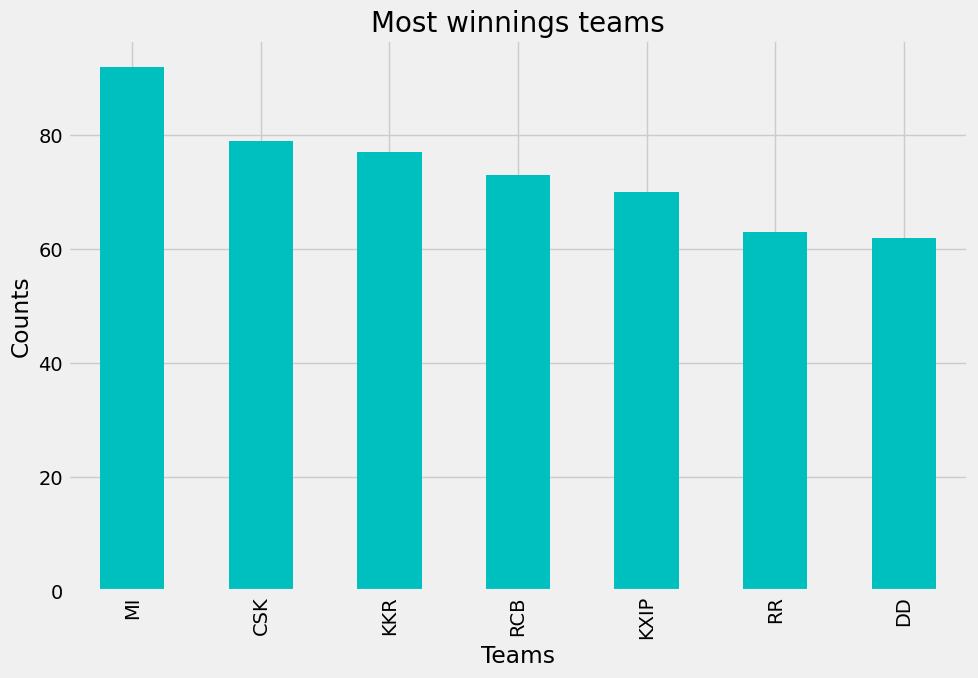

In [ ]:
plt.figure(figsize=(10,7))
matches['winner'].value_counts().head(7).plot(kind='bar',color='c')
plt.xlabel('Teams')
plt.ylabel('Counts')
plt.title('Most winnings teams',fontsize=20)
plt.tight_layout()

In [ ]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
deliveries['is_super_over'].value_counts()

0    150379
1        81
Name: is_super_over, dtype: int64

 ## **Function for Teams performing on Particular Venus**

In [ ]:
def venue_ana(venue, team_name):
  venue_del = matches[matches['venue'] == venue]
  losses = venue_del[venue_del['winner']!=team_name]
  wins = venue_del[venue_del['winner']==team_name]
  wins = list(wins['winner'])
  losses = list(losses['winner'])
  total = wins+losses
  for i in range(len(total)):
      if(total[i] != 'CSK'):
          total[i] = 'Loss'
      else:
          total[i] = 'Win'

  plt.style.use('seaborn')
  plt.hist(total, color='c')
  plt.ylabel('Count')
  plt.figure(figsize=(4,1))
  plt.tight_layout()

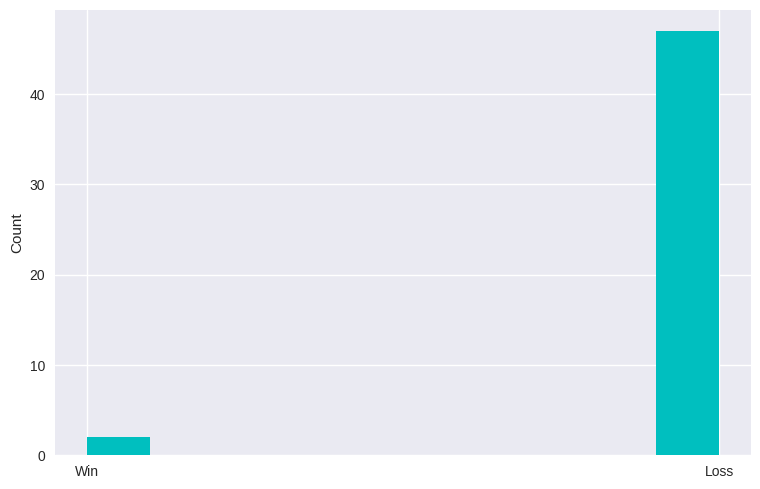

<Figure size 400x100 with 0 Axes>

In [ ]:
venue_ana('Rajiv Gandhi International Stadium, Uppal','CSK')

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
print((matches['win_by_runs'] != 0).value_counts())

False    349
True     287
Name: win_by_runs, dtype: int64


In [ ]:
# team1 = RCB, team2 = KKR
def teamfaceToface(team1,team2):
  team = matches.loc[matches['team1'] == team1]
  team1 = matches.loc[matches['team2'] == team1]
  w1 = list(team.loc[team['team2'] == team2].winner)
  w2 = list(team1.loc[team1['team1'] == team2].winner)

  w = w1+w2
  plt.style.use('seaborn')
  plt.hist(w,color='c')
    # plt.title(f'Win and Lose of {w1} and {w2}')
  plt.xlabel('Teams')
  plt.ylabel('Counts')
  plt.tight_layout()

### **How many wins and how many lose by particular with their particular opponents**

**For this you need to first enter that you want to know how many wins with their opponents**

**Then next you provide your opponent and see their victories and losses**

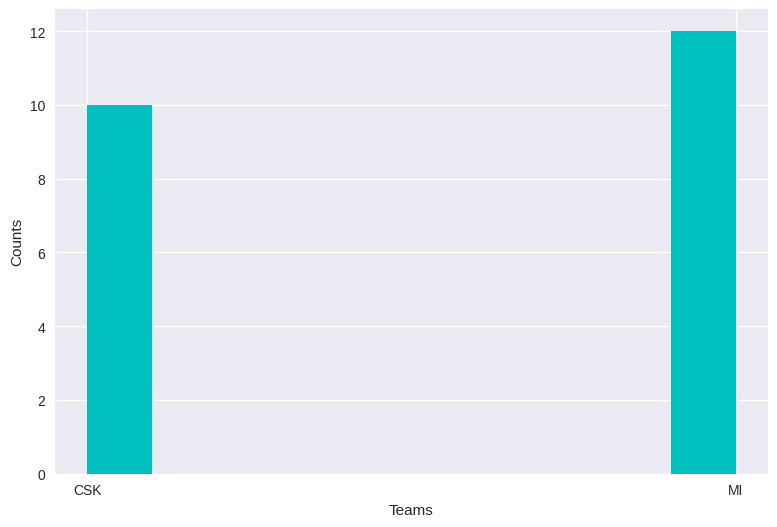

In [53]:
teamfaceToface('CSK','MI')